<a href="https://colab.research.google.com/github/SedefAlkan/RetinaFace_vs_MTCNN/blob/main/MTCNN_RetinaFace_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Yüz Tespiti ve karşılaştırma







In [ ]:
!pip install deepface

In [ ]:
!pip install facenet-pytorch

In [ ]:
!pip install ultralytics

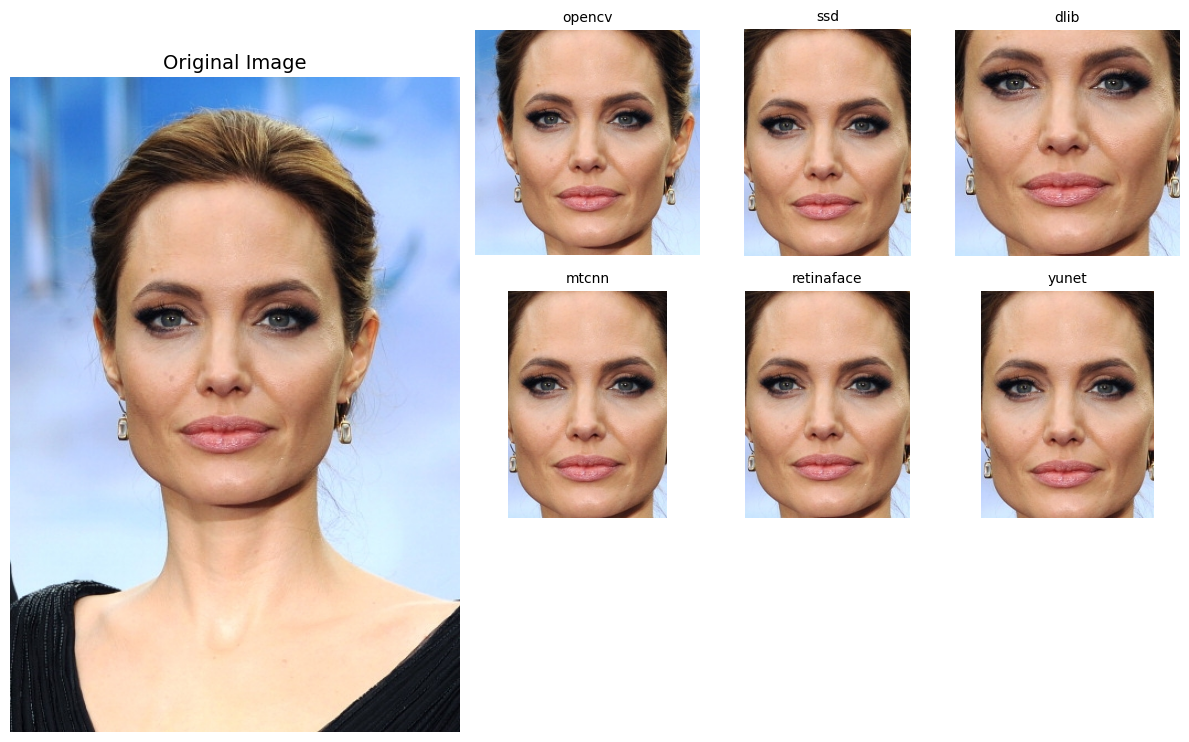

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from deepface import DeepFace


backends = [
    'opencv', 'ssd', 'dlib', 'mtcnn',
    'retinaface', 'yunet'
]


img_path = "img10.jpg"
original_img = cv2.imread(img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Görselleştirme için figürü hazırla
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(3, 4, width_ratios=[2, 1, 1, 1], height_ratios=[1, 1, 1])

ax0 = plt.subplot(gs[:, 0])
ax0.imshow(original_img)
ax0.set_title("Original Image", fontsize=14)
ax0.axis("off")


for i, backend in enumerate(backends[:min(len(backends), 11)]):
    try:

        face_objs = DeepFace.extract_faces(img_path=img_path, detector_backend=backend, align=True)


        if len(face_objs) > 0:
            face_data = face_objs[0]
            facial_area = face_data.get('facial_area', {})

            if facial_area:
                x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
                cropped_face = original_img[y:y+h, x:x+w]

                # Görüntüyü daha küçük slotlara yerleştir
                ax = plt.subplot(gs[(i // 3), (i % 3) + 1])
                ax.imshow(cropped_face)
                ax.set_title(backend, fontsize=10)
                ax.axis("off")
            else:
                print(f"No face detected with {backend}")

    except Exception as e:
        print(f"Error with {backend}: {e}")

plt.tight_layout()
plt.show()


# MTCNN

In [ ]:
!pip install tensorflow

In [ ]:
!pip install mtcnn

In [ ]:
!pip install matplotlib

[{'box': [98, 99, 203, 291], 'confidence': 0.9948492646217346, 'keypoints': {'nose': [194, 272], 'mouth_right': [240, 317], 'right_eye': [245, 219], 'left_eye': [145, 219], 'mouth_left': [152, 317]}}]


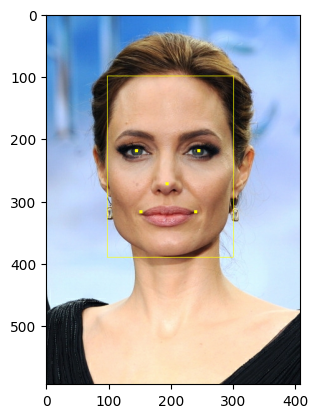

In [ ]:
from mtcnn import MTCNN
from mtcnn.utils.images import load_image
from mtcnn.utils.plotting import plot
import matplotlib.pyplot as plt


image = load_image("img10.jpg")


mtcnn = MTCNN(device="CPU:0")


result = mtcnn.detect_faces(image, threshold_onet=0.85)
print(result)

plt.imshow(plot(image, result))
plt.show()

[{'box': [159, 67, 274, 370], 'confidence': 0.9999890327453613, 'keypoints': {'nose': [302, 297], 'mouth_right': [331, 363], 'right_eye': [369, 244], 'left_eye': [255, 210], 'mouth_left': [228, 333]}}]


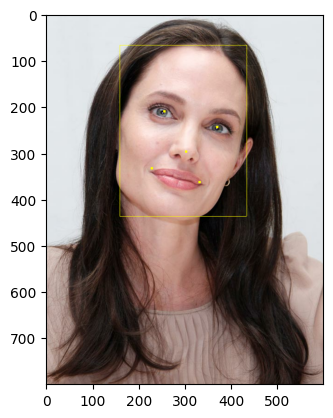

In [ ]:
from mtcnn import MTCNN
from mtcnn.utils.images import load_image
from mtcnn.utils.plotting import plot
import matplotlib.pyplot as plt


image = load_image("img11.jpg")


mtcnn = MTCNN(device="CPU:0")


result = mtcnn.detect_faces(image, threshold_onet=0.85)
print(result)

plt.imshow(plot(image, result))
plt.show()

[{'box': [598, 166, 370, 526], 'confidence': 0.9955780506134033, 'keypoints': {'nose': [761, 501], 'mouth_right': [852, 565], 'right_eye': [854, 387], 'left_eye': [673, 390], 'mouth_left': [695, 569]}}]


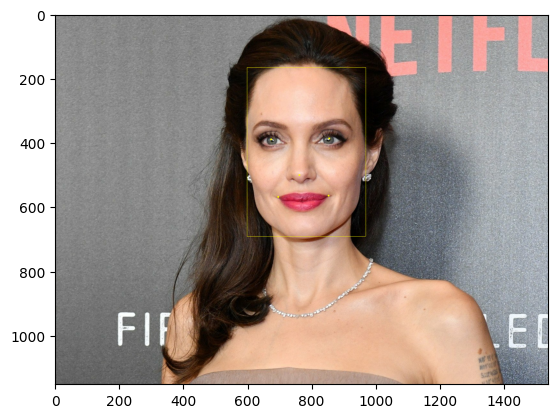

In [ ]:
from mtcnn import MTCNN
from mtcnn.utils.images import load_image
from mtcnn.utils.plotting import plot
import matplotlib.pyplot as plt


image = load_image("img2.jpg")


mtcnn = MTCNN(device="CPU:0")


result = mtcnn.detect_faces(image, threshold_onet=0.85)
print(result)

plt.imshow(plot(image, result))
plt.show()

In [ ]:
from mtcnn import MTCNN
from mtcnn.utils.images import load_images_batch
from mtcnn.utils.plotting import plot
import matplotlib.pyplot as plt


image_paths = ["img10.jpg", "img11.jpg", "img2.jpg"]
images = load_images_batch(image_paths)


mtcnn = MTCNN(device="CPU:0")


results = mtcnn.detect_faces(images, batch_stack_justification="center")


for i, image in enumerate(images):
    plt.figure()
    plt.imshow(plot(image, results[i]))
    plt.title(f"Results for image {i+1}")
    plt.show()

# RetinaFace

In [ ]:
!pip install tensorflow==2.12 keras==2.12



In [ ]:
!pip install retina-face

In [ ]:
!pip install opencv-python


{'face_1': {'score': 0.9995226263999939, 'facial_area': [191, 175, 223, 216], 'landmarks': {'right_eye': [204.92221, 188.17944], 'left_eye': [219.18123, 191.87874], 'nose': [212.0482, 199.27538], 'mouth_right': [201.25473, 203.71756], 'mouth_left': [213.42343, 206.83838]}}, 'face_2': {'score': 0.9993973970413208, 'facial_area': [332, 251, 361, 290], 'landmarks': {'right_eye': [344.1118, 265.59326], 'left_eye': [357.37396, 267.37967], 'nose': [351.47534, 274.05594], 'mouth_right': [342.5639, 278.35965], 'mouth_left': [354.9428, 279.87064]}}, 'face_3': {'score': 0.9993942975997925, 'facial_area': [131, 208, 165, 250], 'landmarks': {'right_eye': [146.12024, 224.04654], 'left_eye': [160.25491, 226.2052], 'nose': [154.18033, 234.84431], 'mouth_right': [142.76059, 238.79352], 'mouth_left': [155.13065, 240.86172]}}, 'face_4': {'score': 0.9993742108345032, 'facial_area': [436, 234, 467, 272], 'landmarks': {'right_eye': [443.3428, 248.71034], 'left_eye': [458.07053, 246.28098], 'nose': [451.459

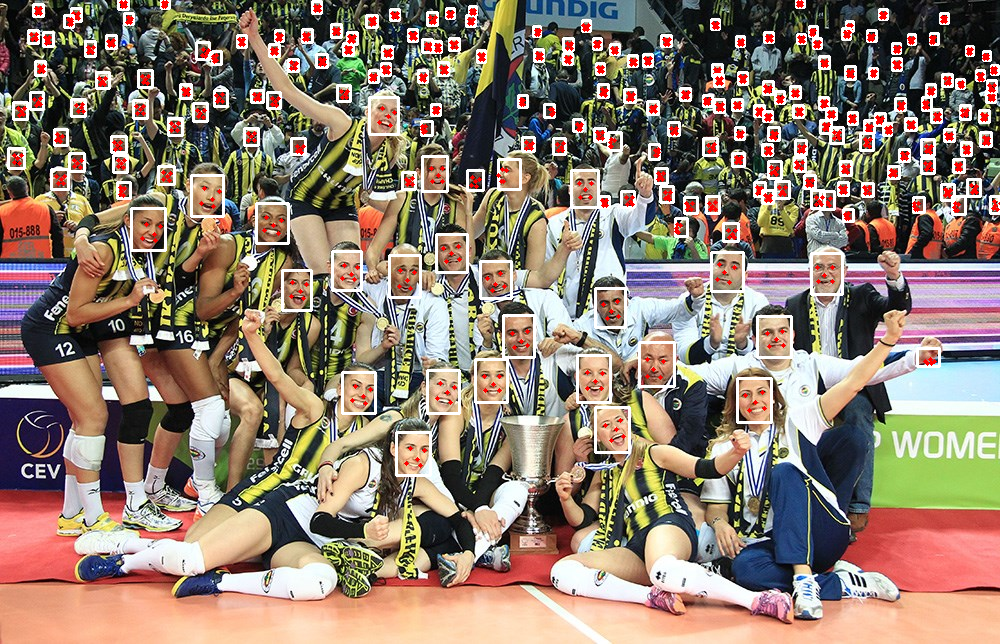

In [ ]:
from retinaface import RetinaFace
import cv2
from google.colab.patches import cv2_imshow


img_path = "img3.jpg"


img = cv2.imread(img_path)

resp = RetinaFace.detect_faces(img_path, threshold=0.5)
print(resp)


for face_id, identity in resp.items():
    facial_area = identity["facial_area"]
    landmarks = identity["landmarks"]


    cv2.rectangle(img, (facial_area[0], facial_area[1]),
                       (facial_area[2], facial_area[3]),
                       (255, 255, 255), 2)


    for key, value in landmarks.items():
        point = tuple(map(int, value))
        cv2.circle(img, point, 2, (0, 0, 255), -1)


cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


{'face_1': {'score': 0.9993440508842468, 'facial_area': [155, 81, 434, 443], 'landmarks': {'right_eye': [257.82974, 209.64787], 'left_eye': [374.93427, 251.78687], 'nose': [303.4773, 299.91144], 'mouth_right': [228.3733, 338.73193], 'mouth_left': [320.21982, 374.58798]}}}


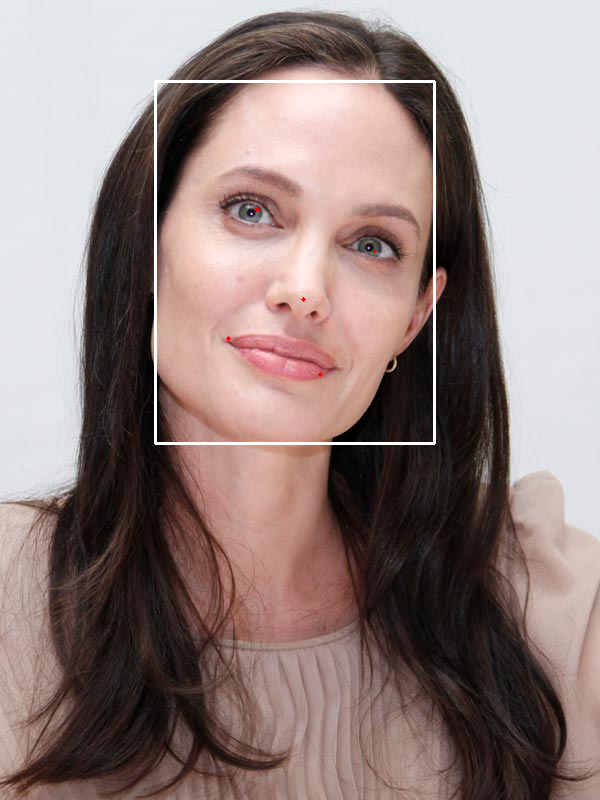

Yüz eğim açısı: 19.79 derece


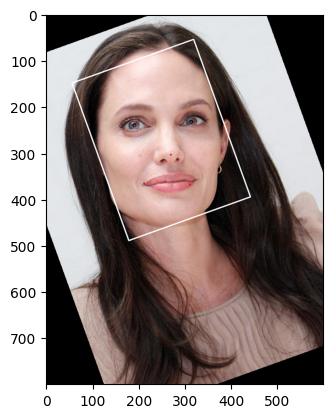

In [ ]:
from retinaface import RetinaFace
import cv2
import numpy as np
import math
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img_path = "img11.jpg"

img = cv2.imread(img_path)


faces = RetinaFace.detect_faces(img_path=img_path)

print(faces)


first_face_id = next(iter(faces))
identity = faces[first_face_id]


facial_area = identity["facial_area"]
landmarks = identity["landmarks"]


right_eye = landmarks["right_eye"]
left_eye = landmarks["left_eye"]


for key, value in landmarks.items():
    point = tuple(map(int, value))  # Landmark koordinatlarını integer tuple'a çevir
    cv2.circle(img, point, 2, (0, 0, 255), -1)


cv2.rectangle(img, (facial_area[0], facial_area[1]), (facial_area[2], facial_area[3]), (255, 255, 255), 2)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()




x1, y1 = right_eye
x2, y2 = left_eye

# Açı hesaplama (Tanjant ile)
dx = x2 - x1
dy = y2 - y1
angle = np.degrees(np.arctan2(dy, dx))  # Yüzün eğim açısı

print(f"Yüz eğim açısı: {angle:.2f} derece")

# OpenCV görüntüsünü PIL formatına çevir
img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Görüntüyü açıya göre döndür
aligned_img = img_pil.rotate(angle, resample=Image.BICUBIC)

plt.imshow(aligned_img)





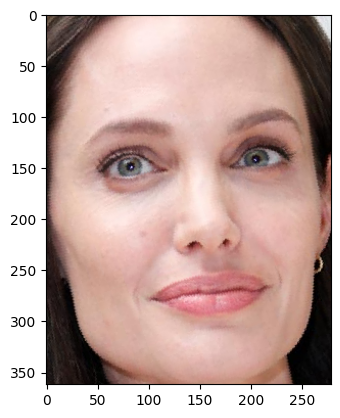

In [ ]:
import matplotlib.pyplot as plt
from retinaface import RetinaFace

faces = RetinaFace.extract_faces(img_path = "img11.jpg", align = True)
for face in faces:
  plt.imshow(face)
  plt.show()